# K-Means Clustering

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import umap


In [36]:
df = pd.read_csv("./clean_dataset.csv")

def exclude_columns(df, columns_to_exclude):
    return df.drop(columns=columns_to_exclude)

columns_to_exclude = ['MildOutlier', "Class"]
df_num = exclude_columns(df, columns_to_exclude)


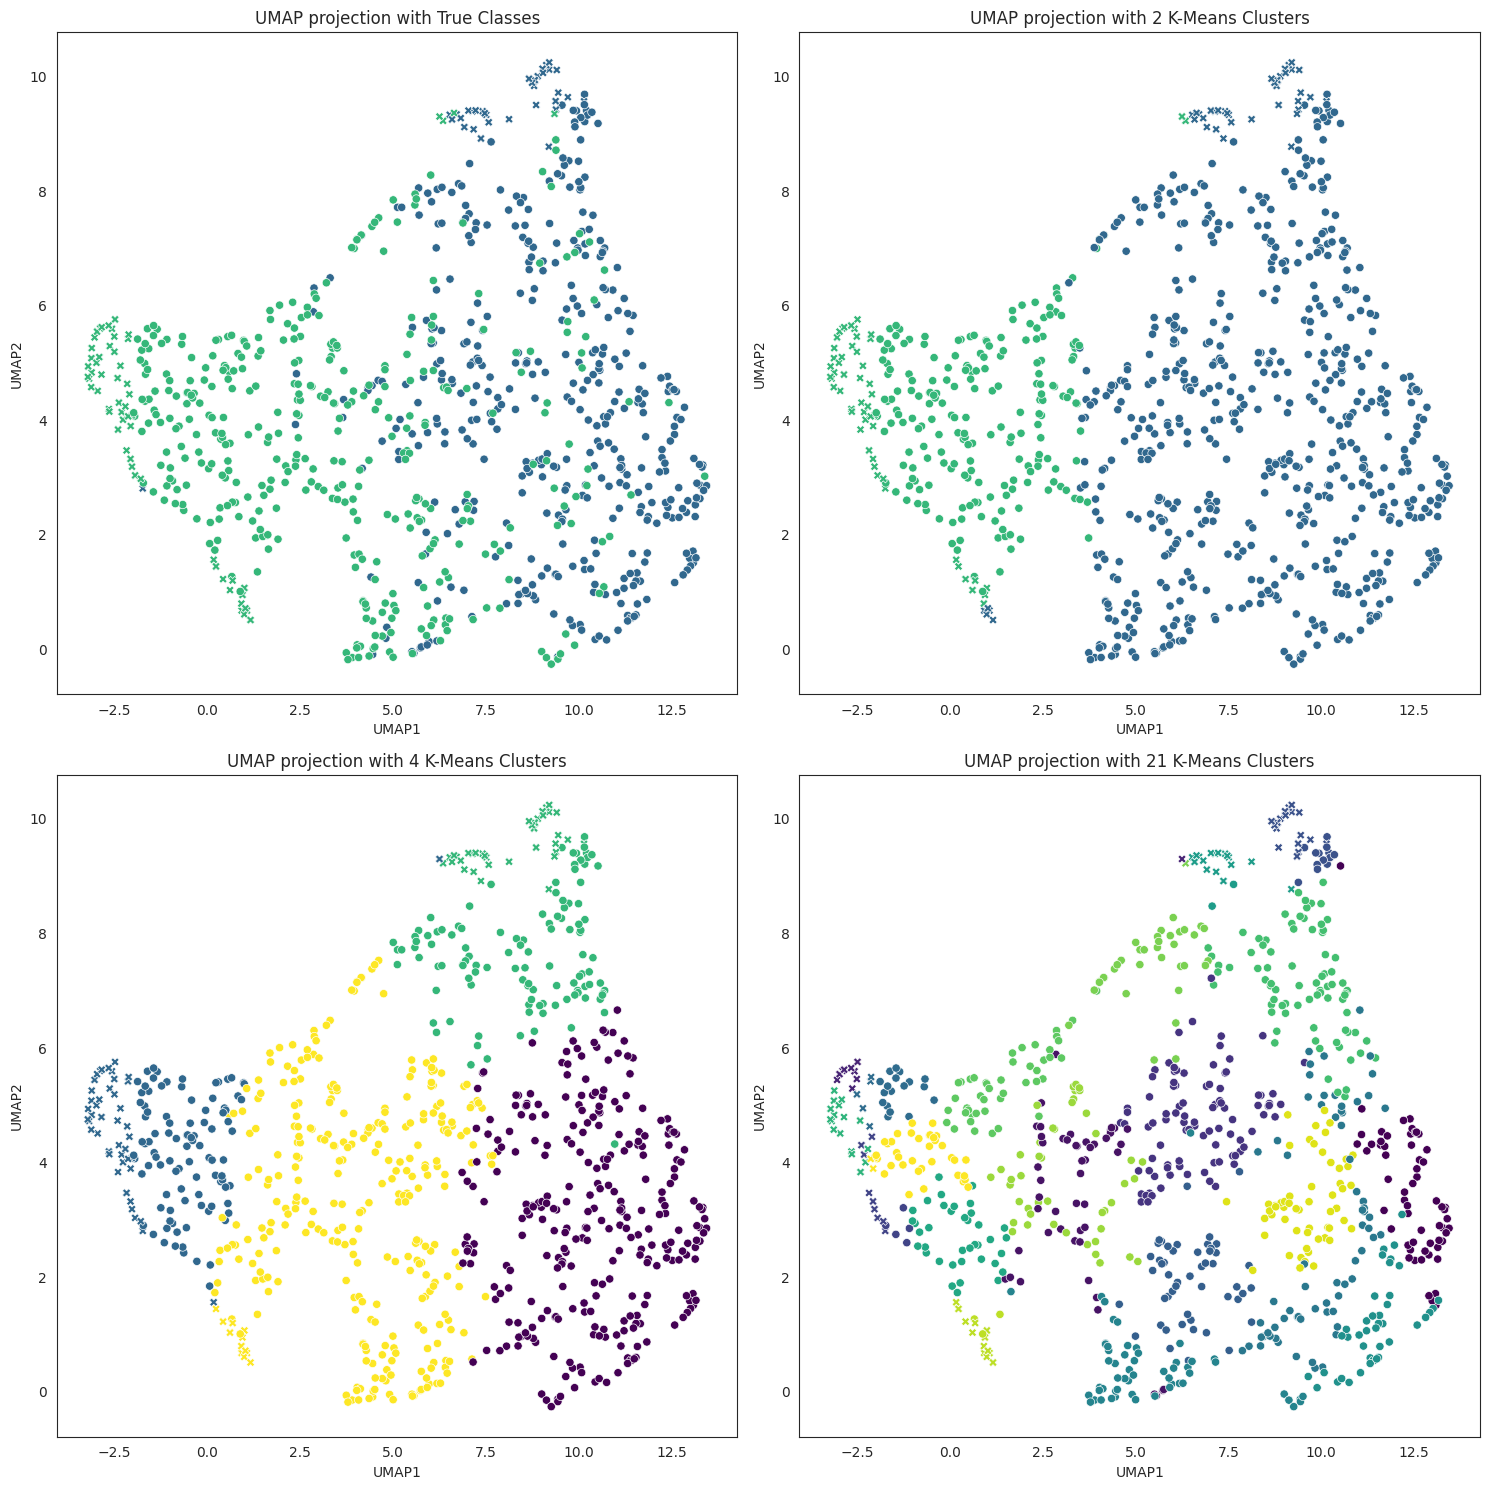

In [37]:
sns.set_style("white")
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

reducer = umap.UMAP(
    n_neighbors=10, min_dist=0.3, metric="euclidean", random_state=69, n_jobs=1
)
embedding = reducer.fit_transform(df_num)

embedding_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
embedding_df["MildOutlier"] = df["MildOutlier"]
embedding_df["Cluster"] = df["Class"]

sns.scatterplot(
    data=embedding_df,
    x="UMAP1",
    y="UMAP2",
    hue="Cluster",
    palette="viridis",
    ax=axs[0, 0],
    style="MildOutlier",
    legend=False,
)
axs[0, 0].set_title("UMAP projection with True Classes")

results = [embedding_df.copy()]
for row, col, n_clusters in [(0, 1, 2), (1, 0, 4), (1, 1, 21)]:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=69)
    kmeans_clusters = kmeans.fit_predict(df_num)

    embedding_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
    embedding_df["Cluster"] = kmeans_clusters
    embedding_df["MildOutlier"] = df["MildOutlier"]

    results.append(embedding_df.copy())

    sns.scatterplot(
        data=embedding_df,
        x="UMAP1",
        y="UMAP2",
        hue="Cluster",
        palette="viridis",
        ax=axs[row, col],
        style="MildOutlier",
        legend=False,
    )
    axs[row, col].set_title(f"UMAP projection with {n_clusters} K-Means Clusters")

plt.tight_layout()
plt.show()


### Stats

In [38]:
def print_res_df_stats(res):
    stat_df = df.copy()
    stat_df["Cluster"] = res["Cluster"]

    cluster_names = stat_df["Cluster"].unique()
    for cn in cluster_names:
        print(f"Cluster {cn} Stats:")
        stats: pd.DataFrame = (
            stat_df.loc[stat_df["Cluster"] == cn]
            .drop("Cluster", axis=1)
            .drop("MildOutlier", axis=1)
            .describe()
            .drop("count")
            .rename(
                index={
                    "mean": "Mean",
                    "std": "Std",
                    "min": "Min",
                    "50%": "Med",
                    "25%": "1Q",
                    "75%": "3Q",
                    "max": "Max",
                }
            )
        )
        print(stats.to_string())
        stats.to_latex(
            f"./hier_cluster_{cn}_stats.tex",
            float_format="%.3f",
            caption=f"Hierachical Cluster {cn} Stats",
            label=f"tab:hier_cluster_{cn}_stats",
        )


print_res_df_stats(results[0])
print_res_df_stats(results[1])


Cluster Kecimen Stats:
          Area  MajorAxisLength  MinorAxisLength  Eccentricity    Extent  Perimeter
Mean  0.180337         0.164400         0.244003      0.646725  0.720770   0.174405
Std   0.080469         0.070906         0.096550      0.138427  0.091537   0.066482
Min   0.000000         0.000000         0.000000      0.156865  0.329057   0.000000
1Q    0.119821         0.117074         0.175631      0.582366  0.661020   0.129853
Med   0.172138         0.162071         0.241551      0.681830  0.725342   0.172926
3Q    0.237241         0.213639         0.305317      0.739389  0.785180   0.218555
Max   0.529204         0.644355         0.525550      0.902779  1.000000   0.711600
Cluster Besni Stats:
          Area  MajorAxisLength  MinorAxisLength  Eccentricity    Extent  Perimeter
Mean  0.410363         0.362961         0.387951      0.769899  0.687065   0.346513
Std   0.183694         0.128218         0.142876      0.107824  0.125327   0.109877
Min   0.073047         0.062902 

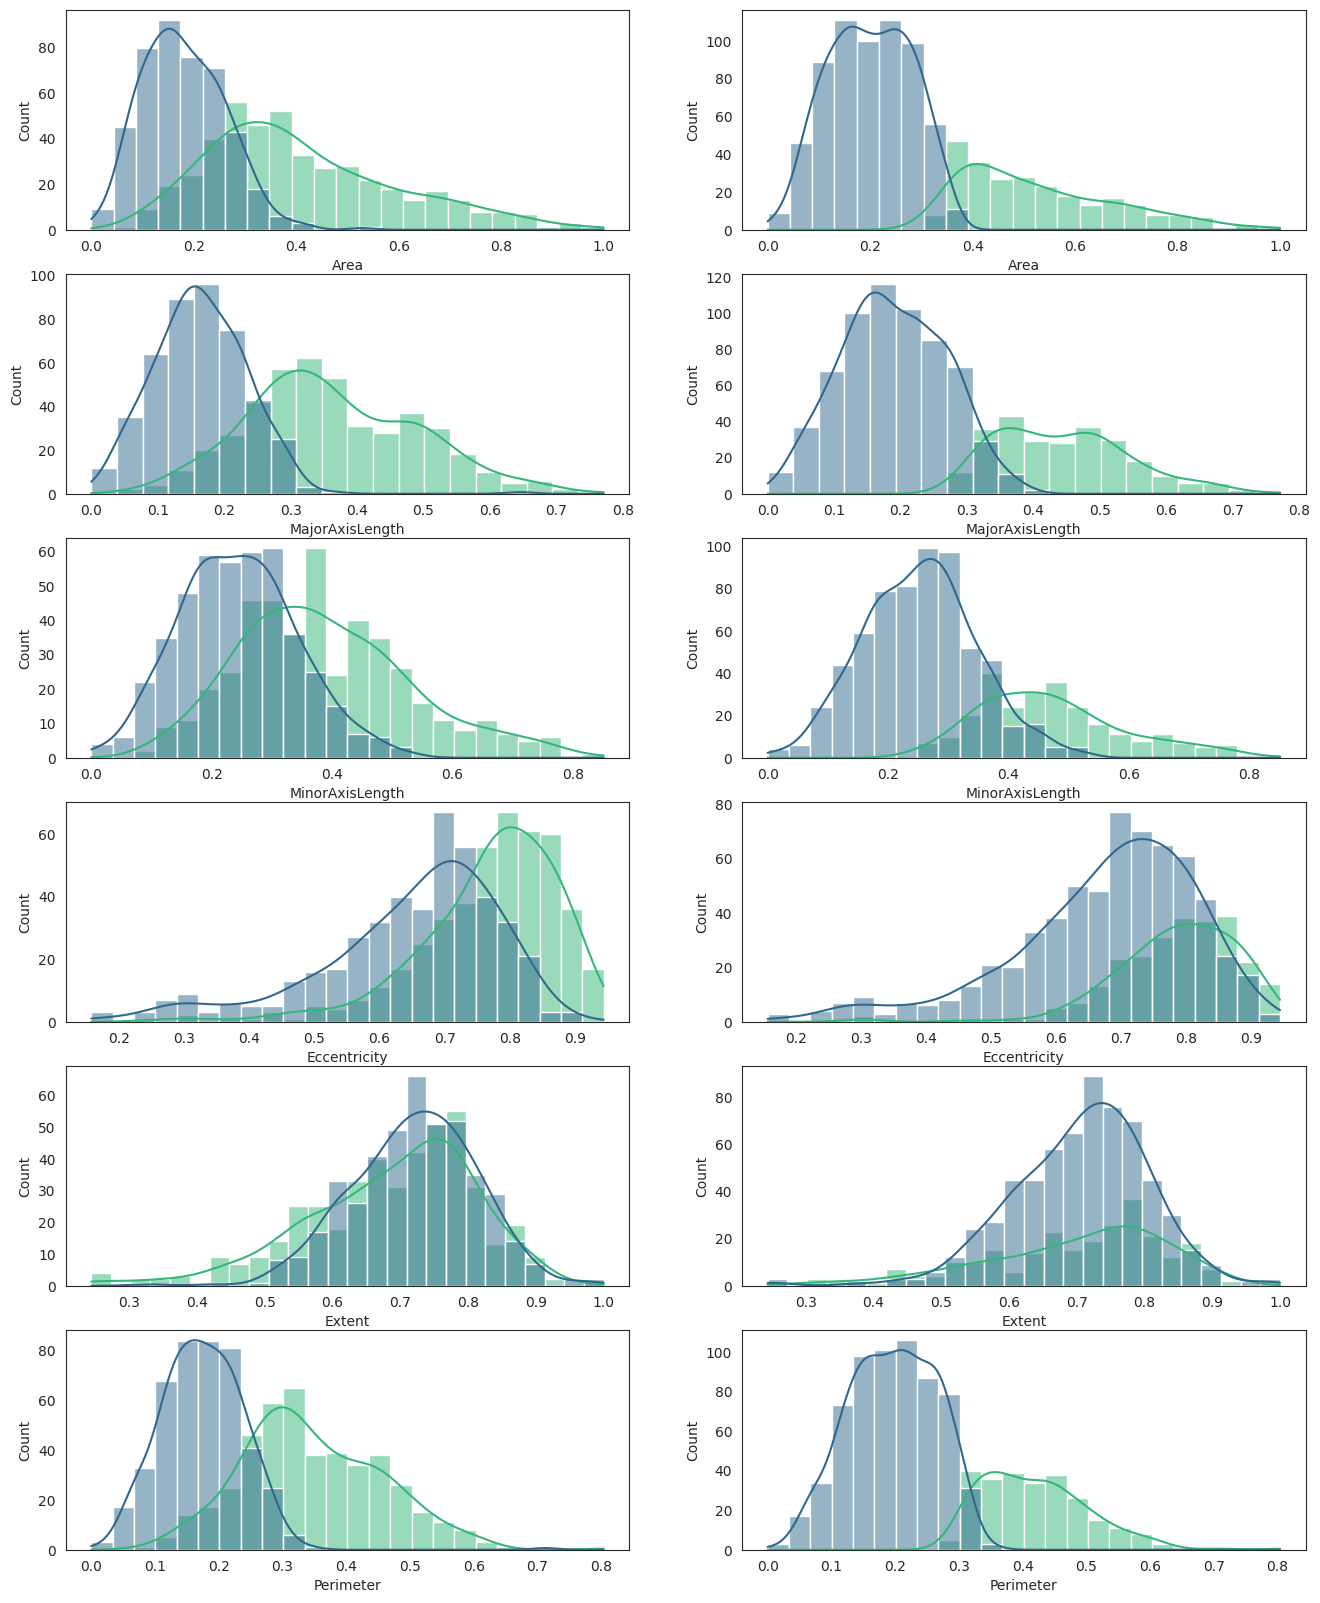

In [39]:
sns.set_style("white")
fig, axs = plt.subplots(figsize=(16, 20), ncols=2, nrows=6)

stat_df = df.copy().drop("MildOutlier", axis=1).drop("Class", axis=1)
for i, col_name in enumerate(stat_df.columns):
    stat_df["Cluster"] = results[0]["Cluster"]

    sns.histplot(
        data=stat_df,
        x=col_name,
        hue="Cluster",
        palette="viridis",
        kde=True,
        ax=axs[i][0],
        legend=False,
    )

    stat_df = df.copy()
    stat_df["Cluster"] = results[1]["Cluster"]

    sns.histplot(
        data=stat_df,
        x=col_name,
        hue="Cluster",
        palette="viridis",
        kde=True,
        ax=axs[i][1],
        legend=False,
    )

plt.show()


## Reversed

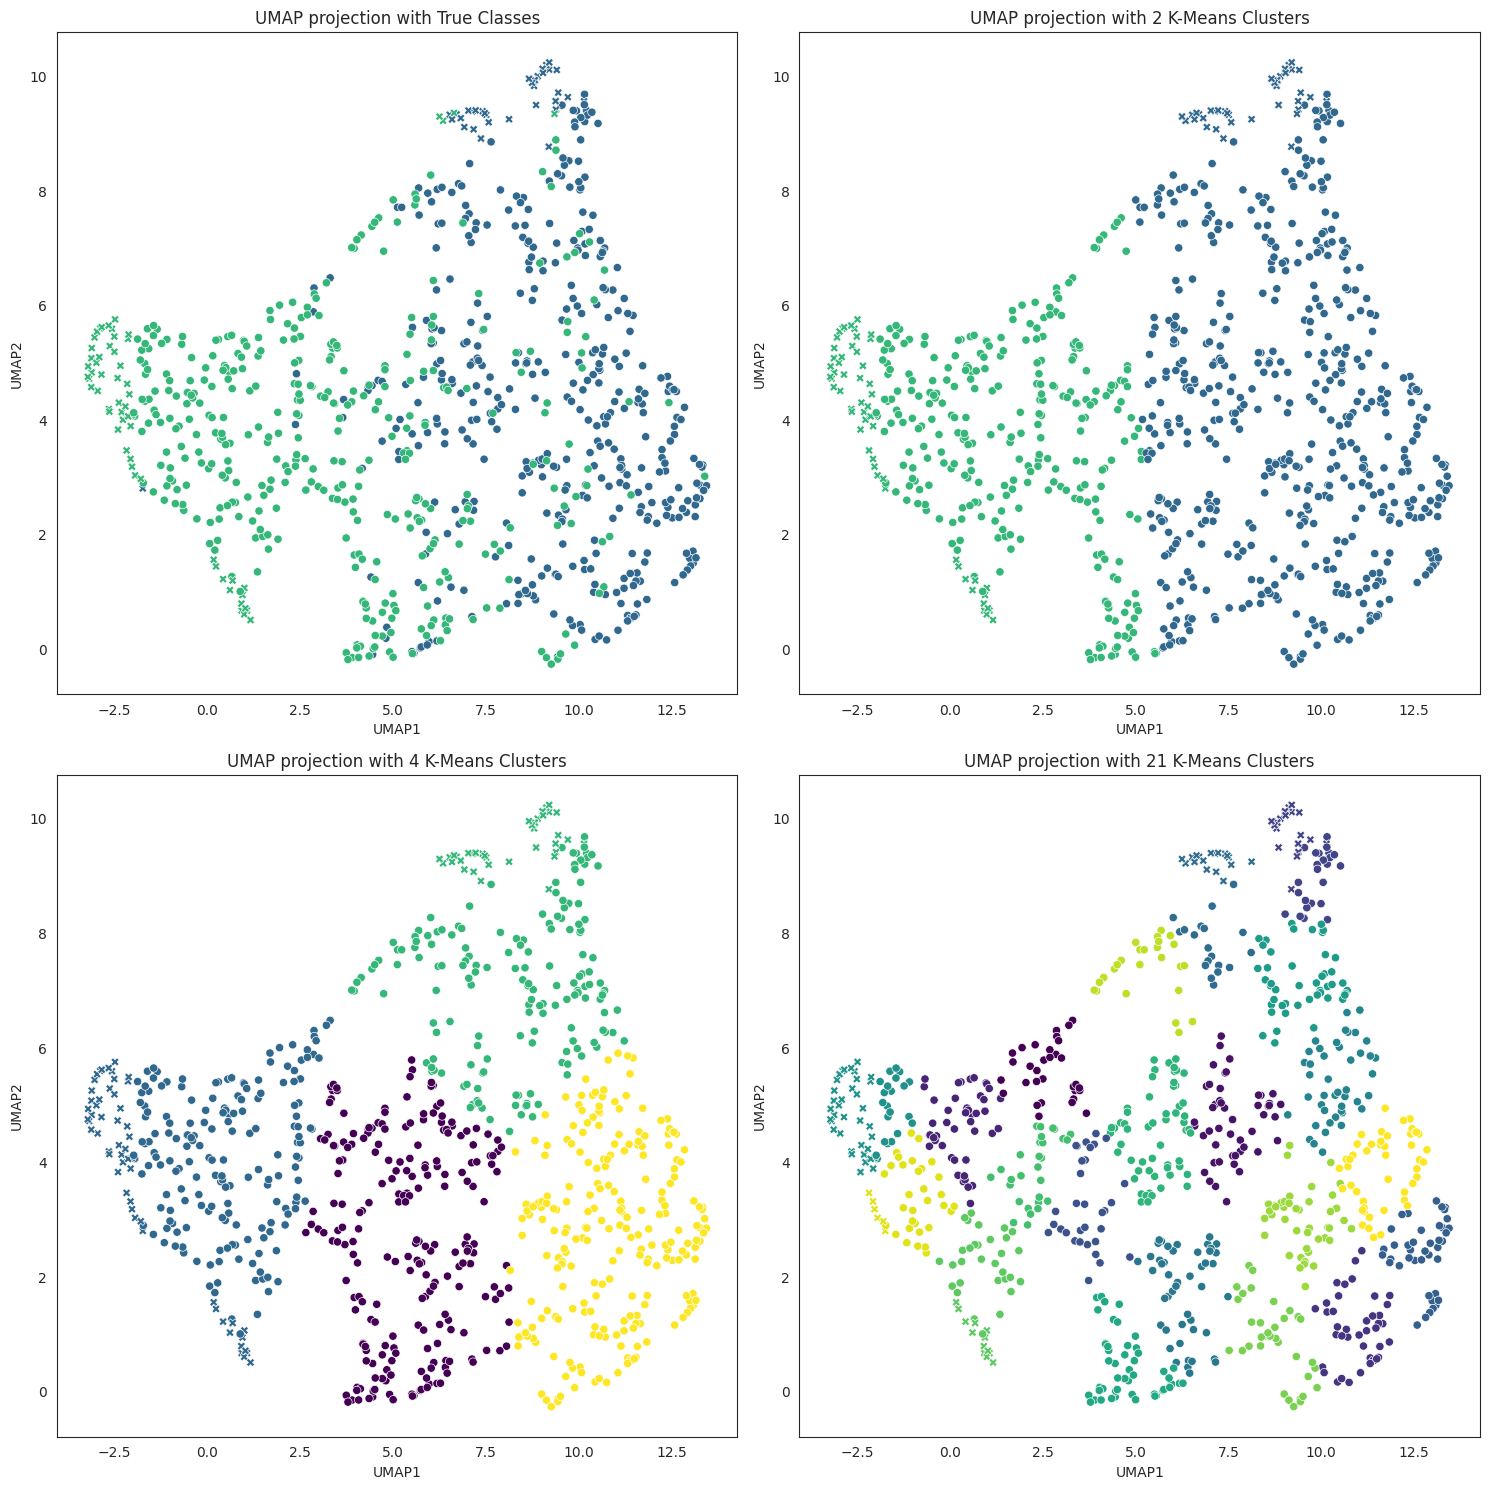

In [40]:
sns.set_style("white")
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

reducer = umap.UMAP(
    n_neighbors=10, min_dist=0.3, metric="euclidean", random_state=69, n_jobs=1
)
embedding = reducer.fit_transform(df_num)

embedding_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
embedding_df["MildOutlier"] = df["MildOutlier"]
embedding_df["Cluster"] = df["Class"]

sns.scatterplot(
    data=embedding_df,
    x="UMAP1",
    y="UMAP2",
    hue="Cluster",
    palette="viridis",
    ax=axs[0, 0],
    style="MildOutlier",
    legend=False,
)
axs[0, 0].set_title("UMAP projection with True Classes")

results = [embedding_df.copy()]
for row, col, n_clusters in [(0, 1, 2), (1, 0, 4), (1, 1, 21)]:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=69)
    kmeans_clusters = kmeans.fit_predict(embedding)

    embedding_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
    embedding_df["Cluster"] = kmeans_clusters
    embedding_df["MildOutlier"] = df["MildOutlier"]

    results.append(embedding_df.copy())

    sns.scatterplot(
        data=embedding_df,
        x="UMAP1",
        y="UMAP2",
        hue="Cluster",
        palette="viridis",
        ax=axs[row, col],
        style="MildOutlier",
        legend=False,
    )
    axs[row, col].set_title(f"UMAP projection with {n_clusters} K-Means Clusters")

plt.tight_layout()
plt.show()
